In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import networkx as nx
from scipy.spatial import distance
import time
from IPython.display import clear_output

Let $X = \{X_i\}_{i \ge 1}$ be a homogeneous Poisson point process with intensity 1 on $\mathbb{R}^2$. The following function returns one realization of the Poisson points in a square. The size of the square is $n$ plus a value dependent on the distances of the points in the inner square. The array <code>x</code> conatains the points in the inner square and the array <code>z</code> the points in the outer envelope.

In [5]:
def onePath(intensity):
    #Generate points in the inner square
    numberOfPoissonPoints = np.random.poisson(intensity)
    xCoordinates = np.random.uniform(0,1,numberOfPoissonPoints)
    yCoordinates = np.random.uniform(0,1,numberOfPoissonPoints)
    x = np.vstack((xCoordinates, yCoordinates)).T
    
    return x

Scatter of a random realization.

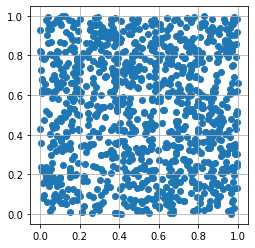

In [8]:
x = onePath(1000)
plt.scatter(x.T[0],x.T[1])
plt.gcf().gca().set_aspect('equal')
plt.grid()
plt.show()

Executing the function <code>onePath(n)</code> over some number of paths.

In [23]:
np.random.seed(1234)
numberOfPaths = 1
intensity = 500
r = 0.03

def rng(coordinates_inner):
    g = nx.Graph()
    for x, y in coordinates_inner:
        g.add_node((x, y), x=x, y=y)
    
    for x in g.nodes():
        for y in g.nodes():
            if 0<distance.euclidean(x,y)<=r:
                g.add_edge((x[0],x[1]), (y[0],y[1]), weight = 1)
 
    return g


# generate some random coordinates
G = []
start = time.time()
for i in range(numberOfPaths):
    clear_output(wait=True)
    coordinates_inner = onePath(intensity)
    G.append(rng(coordinates_inner))
    print("current progress:",i+1,"/",numberOfPaths)

end = time.time()
print("Elapsed time: " + str(end - start) + " seconds")

current progress: 1 / 1
Elapsed time: 3.6635169982910156 seconds


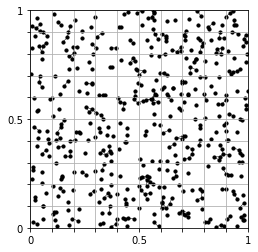

In [24]:
indexH = G.index(sorted(G)[len(G)-1])
nodes = []
edges = []
for x in G[indexH].nodes():
    nodes.append([x[0],x[1]])
    
plt.scatter([x[0] for x in nodes],[x[1] for x in nodes], color='black', s=10)
plt.gcf().gca().set_aspect('equal')
plt.grid()
plt.xlim([0, 1])
plt.xticks(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels =[0,"","","","",0.5,"","","","",1])
plt.ylim([0, 1])
plt.yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], labels =[0,"","","","",0.5,"","","","",1])


for e1, e2 in G[indexH].edges():
    edges.append([[e1[0],e1[1]],[e2[0],e2[1]]])
    plt.plot([e1[0],e2[0]],[e1[1],e2[1]], color='black',lw=.5)
    
plt.show()

Creating Tikz picture

In [ ]:
indexH = 0
points = []
edges = []
for x in G[indexH].nodes():
    points.append([x[0],x[1]])
for e1, e2 in G[indexH].edges():
    if e1[0] != e2[0] or e1[1] != e2[1]:
        edges.append([[e1[0],e1[1]],[e2[0],e2[1]]])
    
borders_string = ["\\fill[fill=gray!20] (-2.5,-2.5) rectangle ++(2.5,15);\n","\\fill[fill=gray!20] (0,-2.5) rectangle ++(10,2.5);\n",
                  "\\fill[fill=gray!20] (10,-2.5) rectangle ++(2.5,15);\n","\\fill[fill=gray!20] (0,10) rectangle ++(10,2.5);\n"]

points_string = ["\\fill ({0:1.2f}, {1:1.2f}) circle (2pt);\n".format(points[i][0], points[i][1])
                 for i in range(len(points))]

edges_string = ["\\draw ({0:1.2f}, {1:1.2f}) -- ({2:1.2f}, {3:1.2f});\n".format(edges[i][0][0],edges[i][0][1],edges[i][1][0],edges[i][1][1])
                for i in range(len(edges))]

tikz = ''.join(borders_string + points_string + edges_string)
tikz = '\\begin{tikzpicture}\n' + tikz + '\\end{tikzpicture}\n'

fname = 'GeometricGraphSparse.tex'

f = open(fname, "w")
f.write(tikz)
f.close()

!pdflatex evolFig.tex